### Madpeople is a band of some friends of mine - go listen to them!

They gave me this data for free so that we could practice in class

This notebook was done in the extra time in S-1 since we finished earlier than expected.

To be fair with both groups, don't expect any question in the exam related to this dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
# get the data
pth = "./spotify_data/"

madpeople = pd.read_csv(pth+"madpeople.tsv", sep="\t")

In [5]:
madpeople

,Reporting Date,Sale Month,Store,Artist,Title,ISRC,UPC,Quantity,Team Percentage,Song/Album,Customer Paid,Customer Currency,Country of Sale,Songwriter Royalties Withheld,Earnings (USD)
0,2019-01-07,2018-11,Amazon,Mad People,Mad People,NaN,1.935372e+11,1,100,Album,NaN,EUR,ES,0,6.116913
1,2019-02-19,2018-11,Google Play,Mad People,Mad People,NaN,1.935372e+11,1,100,Album,0.0,EUR,ES,0,7.969990
2,2019-01-07,2018-08,Amazon Unlimited,Mad People,You Don&#39;t Understand(single Version),QM4DW1893898,NaN,1,100,Song,NaN,EUR,DE,0,0.009892
3,2019-09-18,2019-07,Amazon Unlimited,Mad People,You Don&#39;t Understand(single Version),QM4DW1893898,NaN,1,100,Song,0.0,EUR,es,0,0.003988
4,2018-07-03,2018-04,Apple Music,Mad People,You Don&#39;t Understand(single Version),QM4DW1893898,NaN,2,100,Song,0.0,EUR,ES,0,0.026497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2019-07-23,2019-01,YouTube,Mad People,It Never Ends,QZES61832501,NaN,1,100,Song,0.0,USD,ES,0,0.000000
993,2019-07-23,2019-02,YouTube,Mad People,It Never Ends,QZES61832501,NaN,1,100,Song,0.0,USD,ES,0,0.000000
994,2019-07-23,2019-05,YouTube,Mad People,It Never Ends,QZES61832501,NaN,2,100,Song,0.0,USD,ES,0,0.000000
995,2019-07-23,2018-11,YouTube,Mad People,It Never Ends,QZES61832501,NaN,1,100,Song,0.0,USD,ES,0,0.000000


In [6]:
madpeople.columns

Index(['Reporting Date', 'Sale Month', 'Store', 'Artist', 'Title', 'ISRC',
       'UPC', 'Quantity', 'Team Percentage', 'Song/Album', 'Customer Paid',
       'Customer Currency', 'Country of Sale', 'Songwriter Royalties Withheld',
       'Earnings (USD)'],
      dtype='object')

In [1]:
# total earnings
madpeople["accum_earnings"] = madpeople["Earnings (USD)"].cumsum()

total_earnings = madpeople["accum_earnings"].max()

total_earnings

NameError: name 'madpeople' is not defined

In [10]:
# converting string of date into datetime object
madpeople["Reporting Date"] = pd.to_datetime(madpeople["Reporting Date"])

madpeople.head()

,Reporting Date,Sale Month,Store,Artist,Title,ISRC,UPC,Quantity,Team Percentage,Song/Album,Customer Paid,Customer Currency,Country of Sale,Songwriter Royalties Withheld,Earnings (USD),accum_earnings
0,2019-01-07,2018-11,Amazon,Mad People,Mad People,NaN,1.935372e+11,1,100,Album,NaN,EUR,ES,0,6.116913,6.116913
1,2019-02-19,2018-11,Google Play,Mad People,Mad People,NaN,1.935372e+11,1,100,Album,0.0,EUR,ES,0,7.969990,14.086903
2,2019-01-07,2018-08,Amazon Unlimited,Mad People,You Don&#39;t Understand(single Version),QM4DW1893898,NaN,1,100,Song,NaN,EUR,DE,0,0.009892,14.096796
3,2019-09-18,2019-07,Amazon Unlimited,Mad People,You Don&#39;t Understand(single Version),QM4DW1893898,NaN,1,100,Song,0.0,EUR,es,0,0.003988,14.100784
4,2018-07-03,2018-04,Apple Music,Mad People,You Don&#39;t Understand(single Version),QM4DW1893898,NaN,2,100,Song,0.0,EUR,ES,0,0.026497,14.127281


In [11]:
# total time since their first release

first_date = madpeople["Reporting Date"].min()

last_date = madpeople["Reporting Date"].max()

last_date - first_date

In [18]:
# total countries that listen to them
countries = madpeople["Country of Sale"].unique()

len(countries)

51

In [19]:
madpeople["Country of Sale"] = madpeople["Country of Sale"].str.lower()

countries = madpeople["Country of Sale"].unique()

len(countries)

47

In [20]:
madpeople["Country of Sale"].value_counts()

es    612
us     80
gb     44
au     33
ca     23
cl     20
de     18
nl     17
az     14
at     13
mx     12
ar     11
it      9
ph      8
pt      8
br      7
fr      6
se      5
cz      4
pe      4
be      3
cr      3
ru      3
hu      3
ie      3
id      3
hk      2
ro      2
ch      2
in      2
ni      2
no      2
ec      2
lv      2
za      2
tr      2
th      1
pl      1
nz      1
co      1
gt      1
fi      1
my      1
jp      1
vn      1
il      1
sg      1
Name: Country of Sale, dtype: int64

In [23]:
# top countries earnings-wise

(
    madpeople
    .groupby("Country of Sale")
    .sum()
    [["Earnings (USD)"]]
    .sort_values(by="Earnings (USD)", ascending=False)
)

,Earnings (USD)
Country of Sale,
es,36.659191
au,0.840491
us,0.432930
gb,0.366186
at,0.135004
ca,0.098226
de,0.089369
nl,0.063620
it,0.042061


In [24]:
# platforms on which they sell music
madpeople["Store"].unique()

array(['Amazon', 'Google Play', 'Amazon Unlimited', 'Apple Music',
       'Deezer', 'Spotify', 'Tidal', 'YouTube', 'Google Play All Access',
       'YouTube Red', 'Anghami'], dtype=object)

In [25]:
# number of songs/albums played/bought on each platform
(
    madpeople
    .groupby("Store")
    .sum()
    [["Quantity"]]
    .sort_values(by="Quantity", ascending=False)
)

,Quantity
Store,
Spotify,8881
Apple Music,163
YouTube,139
Google Play All Access,128
Amazon Unlimited,62
Deezer,28
Tidal,6
YouTube Red,6
Amazon,1


In [26]:
# top earnings per platform
(
    madpeople
    .groupby("Store")
    .sum()
    [["Earnings (USD)"]]
    .sort_values(by="Earnings (USD)", ascending=False)
)

,Earnings (USD)
Store,
Spotify,21.621745
Google Play,7.969990
Amazon,6.116913
Apple Music,1.974836
Google Play All Access,0.789323
Amazon Unlimited,0.406519
YouTube Red,0.086210
YouTube,0.045252
Deezer,0.024215


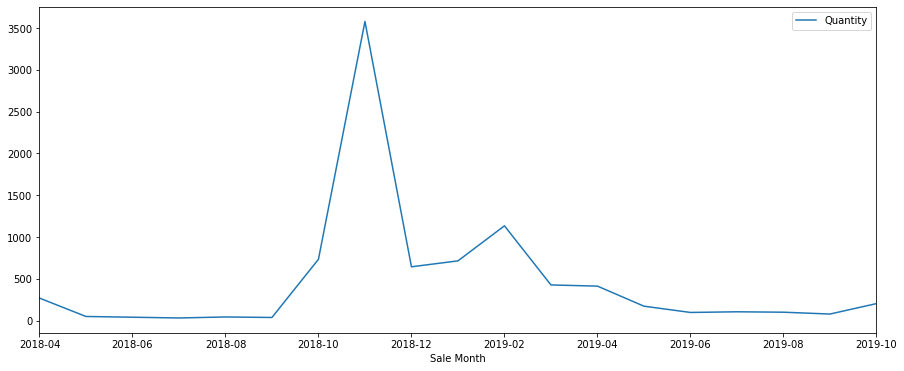

In [33]:
# evolution of quantity in Spotify

(
    madpeople
    [madpeople["Store"]=="Spotify"]
    .groupby("Sale Month")
    .sum()
    [["Quantity"]]
    .sort_index()
    .plot(figsize=(15, 6))
)

In [41]:
# which platform pays the best?

# calculate ratio earnings/quantity
madpeople["ratio_E/Q"] = (
    madpeople["Earnings (USD)"] / madpeople["Quantity"]
)

sum_mad = madpeople.groupby("Store").sum()

sum_mad["ratio_E/Q"] = sum_mad["Earnings (USD)"] / sum_mad["Quantity"]

sum_mad[["ratio_E/Q"]].sort_values(by="ratio_E/Q", ascending=False)

,ratio_E/Q
Store,
Google Play,7.969990
Amazon,6.116913
YouTube Red,0.014368
Apple Music,0.012116
Amazon Unlimited,0.006557
Google Play All Access,0.006167
Tidal,0.003210
Spotify,0.002435
Deezer,0.000865


In [52]:
# change the name of a single column
madpeople.rename(columns={"Song/Album": "Song_album"}, inplace=True)

In [55]:
# top played songs in spotify

(
    madpeople
    .query("Store == 'Spotify'")
    .query("Song_album == 'Song'")
    .groupby("Title")
    .sum()
    .sort_values(by="Quantity", ascending=False)
    [["Quantity"]]
)

,Quantity
Title,
Time to Pretend,1145
Angel,1090
This Is It,862
You Don&#39;t Understand(single Version),825
Something to Believe,782
You Don&#39;t Understand (Remastered),781
Born to Run,744
I Fall,725
Ordinary Day,657
